# エラーバー付きグラフの書き方

エラーバー付きのグラフを作成する際にはTGraphErrorsをつかう。  
書式  
```c++
    new TGraphErrors(データの数、x配列, y配列, x error配列, y error配列);
```
詳しくは[ROOTのホームページ参照](https://root.cern.ch/doc/master/classTGraphErrors.html)


[Particle Data Group](http://pdglive.lbl.gov)にまとめられている$\Upsilon$粒子 (bクォークと反bクォークで構成される中間子)の質量と幅をグラフにしてみる。  
必要な配列を準備

In [1]:
const int num = 4; // 配列の要素数を6に設定constはこの変数は固定であることを示す。
double m[num] = {9460.30, 10023.26, 10355.2, 10579.4}; // 質量　(MeV)
double w[num] = {54.02, 31.98, 20.32, 20.5}; // 幅 (keV)
double dm[num] = {0.26, 0.31, 0.5, 1.2}; // 質量の誤差
double dw[num] = {1.25, 2.63, 1.85, 2.5}; // 幅の誤差

キャンバスの作成

In [2]:
auto c = new TCanvas("can","",400,400);

エラー付きグラフの作成

In [3]:
auto gre = new TGraphErrors(num,m,w,dm,dw);

作成したグラフを表示。  
ここでオプション`A`はフレームを描く、`P`はマーカーを描く。

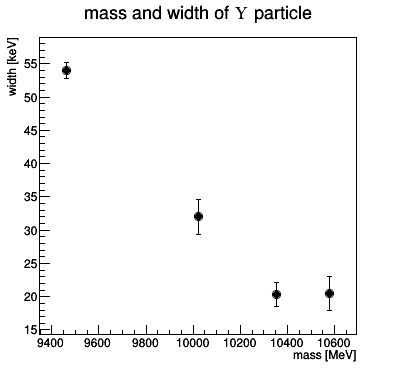

In [30]:
gre->SetMarkerStyle(8); // マーカーを○印にする
gre->SetMarkerSize(1); // マーカーサイズを変更
gre->SetTitle("mass and width of #Upsilon particle"); //タイトル
gre->GetXaxis()->SetTitle("mass [MeV]"); // 横軸のタイトル
gre->GetYaxis()->SetTitle("width [keV]"); // 縦軸のタイトル
gre->Draw("AP"); 
c->Draw();